# Figure 5B

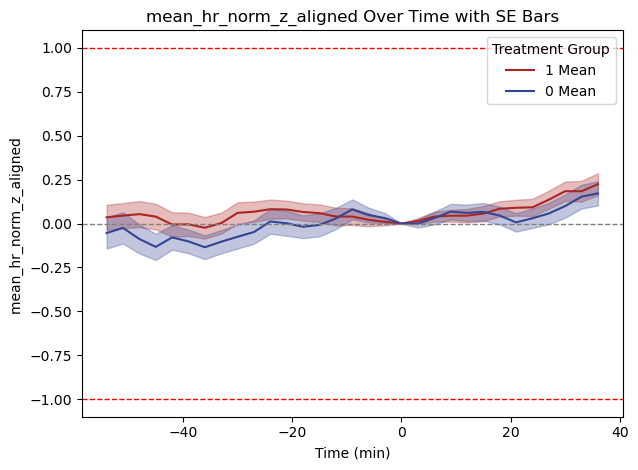

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
def normalize_z_score(value, baseline, std):
    if std == 0:  # To avoid division by zero
        return np.nan
    return (value - baseline) / std

df_hrv_norm = pd.read_csv('normalized_hrv_shortterm.csv', index_col=0)

def find_reference_value(df, subject, day, session, feature):
    # Try to find the value at time 0
    ref_value = df[(df['subj'] == subject) & (df['research_day'] == day) & 
                   (df['am_pm'] == session) & (df['time'] == 0)][feature]
    
    if ref_value.empty:
        # If time 0 is not available, try -3 and then 3
        ref_value = df[(df['subj'] == subject) & (df['research_day'] == day) & 
                       (df['am_pm'] == session) & (df['time'] == -3)][feature]
        if ref_value.empty:
            ref_value = df[(df['subj'] == subject) & (df['research_day'] == day) & 
                           (df['am_pm'] == session) & (df['time'] == 3)][feature]
    
    return ref_value.iloc[0] if not ref_value.empty else np.nan

def clean_data_for_plotting(df, feature):
    df = df.replace([np.inf, -np.inf], np.nan)
    df = df.dropna(subset=[feature])
    return df

df2plot = df_hrv_norm.copy()
df2plot = df2plot[df2plot['time'].between(-54, 36)]


color_mapping = {1:  "#AB2522" , 
                0: "#334493" ,}
feature_of_interest = ['mean_hr']
for feature in feature_of_interest:
    aligned_feature = f'{feature}_norm_z_aligned'
    df2plot[aligned_feature] = np.nan

    # Iterate over each subject, day, and session
    for subject in df2plot['subj'].unique():
        for day in df2plot['research_day'].unique():
            for am_pm in df2plot['am_pm'].unique():
                ref_value = find_reference_value(df2plot, subject, day, am_pm, f'{feature}_norm_z')
                condition = (df2plot['subj'] == subject) & (df2plot['research_day'] == day) & (df2plot['am_pm'] == am_pm)
                df2plot.loc[condition, aligned_feature] = df2plot[condition][f'{feature}_norm_z'] - ref_value


    stats_df = df_clean.groupby(['time', 'treatment'])[aligned_feature].agg(['mean', 'sem']).reset_index()
    for treatment in df_clean['treatment'].unique():
        sub_df = stats_df[stats_df['treatment'] == treatment]
        plt.plot(sub_df['time'], sub_df['mean'], label=f'{treatment} Mean', color=color_mapping.get(treatment, 'black'))
        plt.fill_between(sub_df['time'], sub_df['mean'] - sub_df['sem'], sub_df['mean'] + sub_df['sem'],
                         color=color_mapping.get(treatment, 'black'), alpha=0.3)

    plt.title(f'{aligned_feature} Over Time with SE Bars')
    plt.xlabel('Time (min)')
    plt.ylabel(f'{aligned_feature} ')
    plt.legend(title='Treatment Group')
    plt.tight_layout()
    plt.axhline(0, color='grey', linestyle='--', linewidth=1)  # Grey dashed line at y=0
    plt.axhline(1, color='red', linestyle='--', linewidth=1)   # Red dashed line at y=+1
    plt.axhline(-1, color='red', linestyle='--', linewidth=1)  # Red dashed line at y=-1

    plt.show()




# Figure 5C-E

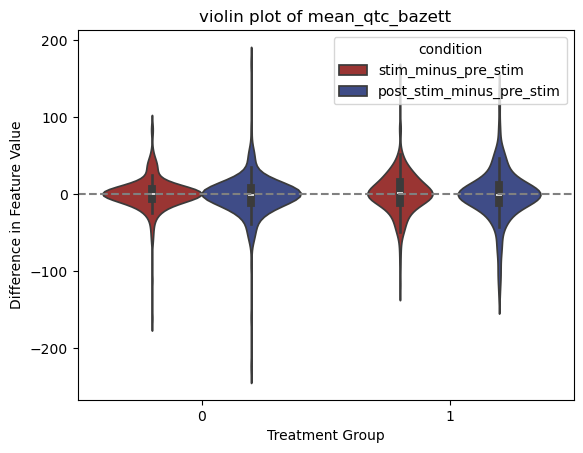

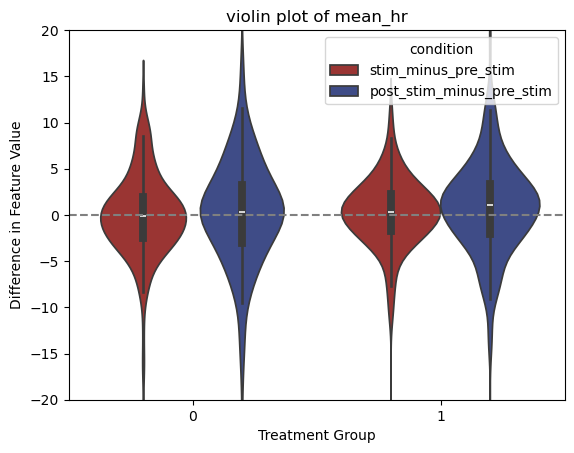

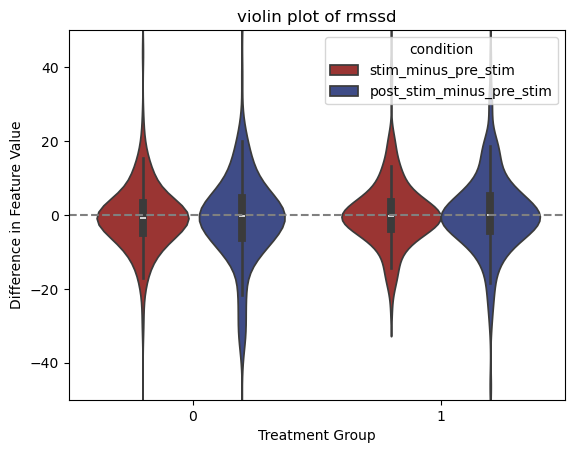

In [33]:
df2plot = pd.read_csv('df_hrv_shortterm_diff.csv', index_col=0)
palette = ['#AB2522','#334493']
stim_condition_order = ['stim_minus_pre_stim', 'post_stim_minus_pre_stim']
def adjust_line_pos(x, width=0.2):
    return [x - width/2, x + width/2]
feature_of_interest
for feature in feature_of_interest:
    df2plot_one_feature = df2plot[df2plot['feature']==feature]

    plt.figure()
    ax = sns.violinplot(x='treatment', y='diff', hue='condition', data=df2plot_one_feature,
                        palette=palette, hue_order=stim_condition_order)

    plt.axhline(y=0, color='gray', linestyle='--')
    if feature == 'rmssd':
        plt.ylim([-50, 50])
    if feature == 'mean_hr':
        plt.ylim([-20, 20])
    plt.title(f'violin plot of {feature}')
    plt.xlabel('Treatment Group')
    plt.ylabel('Difference in Feature Value')
    plt.show()



# Figure 5F

/var/folders/6r/pj2ql3m51fv8_ycglzy0hnh40000gn/T/ipykernel_21354/1215063162.py:6: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.boxplot(data=df_diff[df_diff['Feature'] == feature],
/var/folders/6r/pj2ql3m51fv8_ycglzy0hnh40000gn/T/ipykernel_21354/1215063162.py:12: UserWarning: The palette list has more values (8) than needed (6), which may not be intended.
  sns.stripplot(data=df_diff[df_diff['Feature'] == feature],


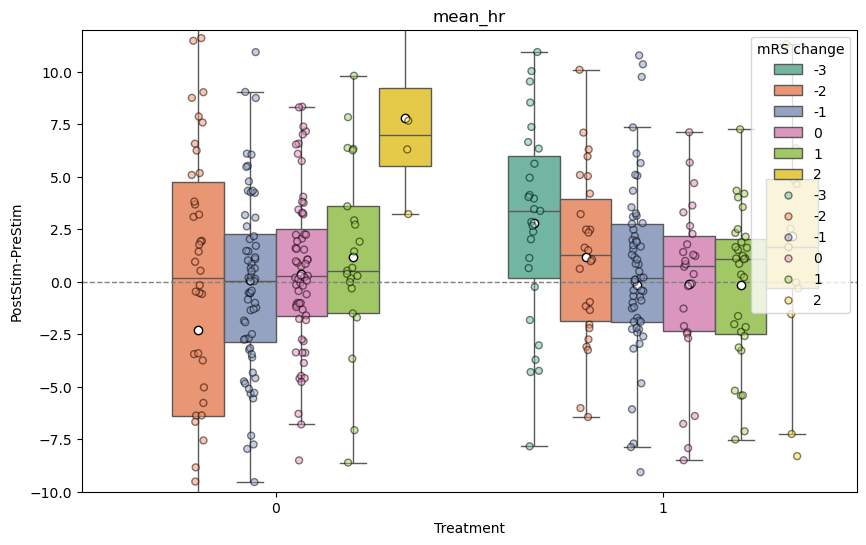

In [42]:
df_diff = pd.read_csv('df_hr_mrs.csv', index_col=0)
feature_of_interest = ['mean_hr']
for feature in feature_of_interest:
    plt.figure(figsize=(10, 6))

    sns.boxplot(data=df_diff[df_diff['Feature'] == feature], 
                x='treatment', y='post_stim_minus_pre_stim', hue='mRS_change',
                palette=palette, showmeans=True, 
                meanprops={"marker":"o", "markerfacecolor":"white", "markeredgecolor":"black"},
                showfliers=False)

    sns.stripplot(data=df_diff[df_diff['Feature'] == feature], 
                  x='treatment', y='post_stim_minus_pre_stim', hue='mRS_change', 
                  palette=palette, jitter=True, dodge=True, marker='o', alpha=0.5,
                  edgecolor='black', linewidth=1)
    plt.axhline(0, color='grey', linestyle='--', linewidth=1)  
    if feature == 'mean_hr':
        plt.ylim([-10, 12])
    plt.title(f'{feature}')
    plt.xlabel('Treatment')
    plt.ylabel('PostStim-PreStim')
    plt.legend(title='mRS change', loc='upper right')
    
    plt.show()
